## Medial Axis


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid
from skimage.morphology import medial_axis
from skimage.util import invert
from planning import a_star
%matplotlib inline 

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

In [3]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ..., 
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


Starting and goal positions in *(north, east)*.

In [4]:
start_ne = (25,  100)
goal_ne = (650, 500)

In [5]:
# Static drone altitude (meters)
drone_altitude = 5
safety_distance = 2

In [6]:
grid = create_grid(data, drone_altitude, safety_distance)
skeleton = medial_axis(invert(grid))


Plot the edges on top of the grid along with start and goal locations.

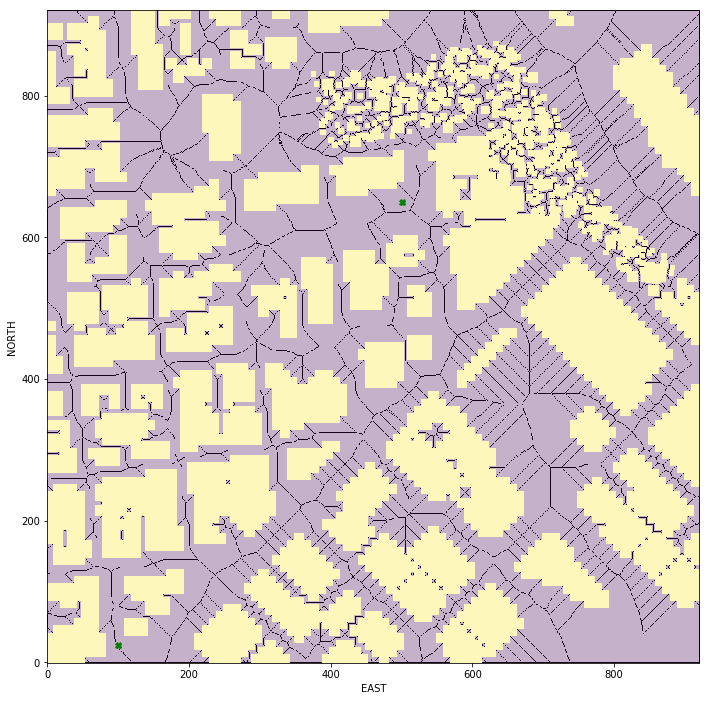

In [7]:
# equivalent to
# plt.imshow(np.flip(grid, 0))

plt.imshow(grid,  origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
    
plt.plot(start_ne[1], start_ne[0], 'gX')
plt.plot(goal_ne[1], goal_ne[0], 'gX')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [8]:
# TODO: Your start and goal location defined above
# will not necessarily be on the skeleton so you
# must first identify the nearest cell on the 
# skeleton to start and goal

def find_start_goal(skel, start, goal):
    # TODO: find start and goal on skeleton
    # Some useful functions might be:
        # np.nonzero()
        # np.transpose()
        # np.linalg.norm()
        # np.argmin()
    skel_cells = np.transpose(skel.nonzero())
    start_min_dist = np.linalg.norm(np.array(start) - np.array(skel_cells), axis=1).argmin()
    near_start = skel_cells[start_min_dist]
    goal_min_dist = np.linalg.norm(np.array(goal) - np.array(skel_cells), axis=1).argmin()
    near_goal = skel_cells[goal_min_dist]
    
    return near_start, near_goal

skel_start, skel_goal = find_start_goal(skeleton, start_ne, goal_ne)

print(start_ne, goal_ne)
print(skel_start, skel_goal)

(25, 100) (650, 500)
[24 99] [636 501]


In [9]:
def heuristic_func(position, goal_position):
    # TODO: define a heuristic
    x, y = position
    x_goal, y_goal = goal_position
    h = np.sqrt((np.square(x - x_goal) + np.square(y - y_goal)))
    return h
    

### TODO: Run A* on the skeleton
see [planning.py](/edit/planning.py) for a reminder on how to run the imported A* implementation (or rewrite it!)

In [10]:
path, cost = a_star(invert(skeleton).astype(np.int), heuristic_func, 
                    tuple(skel_start), tuple(skel_goal))

Found a path.


In [11]:
# Compare to regular A* on the grid
path2, cost2 = a_star(grid, heuristic_func, start_ne, goal_ne)


Found a path.


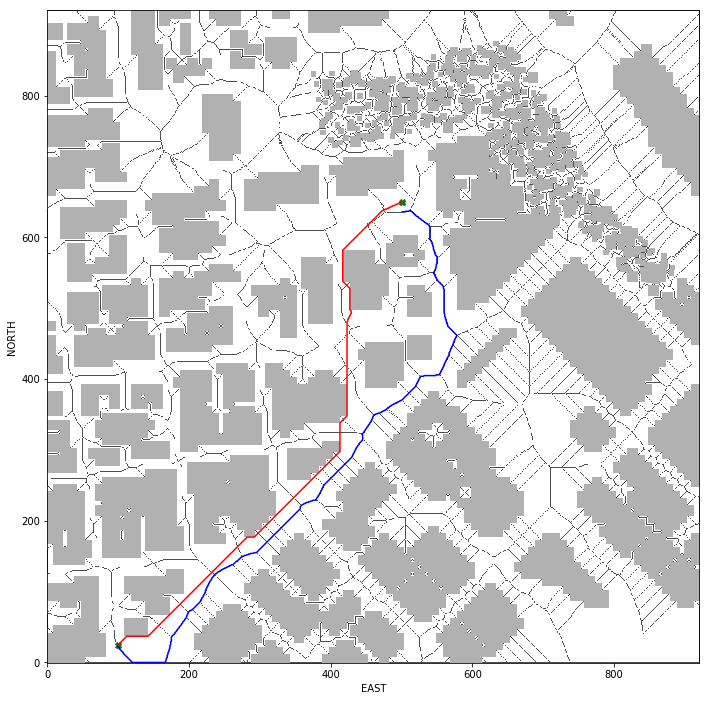

In [12]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'gX')
# Uncomment the following as needed
plt.plot(goal_ne[1], goal_ne[0], 'gX')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'b')
pp2 = np.array(path2)
plt.plot(pp2[:, 1], pp2[:, 0], 'r')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Medial-Axis-Solution.ipynb)